# 使用QQQ模擬TQQQ的獲利
主要要測試歷史性大崩盤的風險

count    5313.000000
mean       86.646204
std        66.744234
min        20.059999
25%        39.759998
50%        57.169998
75%       110.000000
max       342.010010
Name: Close, dtype: float64


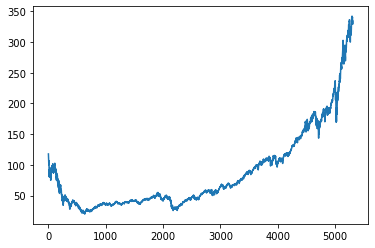

In [1]:
import pandas as pd
df = pd.read_csv('./QQQ.csv')
print(df['Close'].describe())
df['Close'].plot()

### TQQQ 股價模擬
初始金額為`100`

count    5313.000000
mean        3.045132
std         6.991558
min         0.040698
25%         0.276720
50%         0.482524
75%         2.070844
max       100.000000
Name: TQQQ Price, dtype: float64


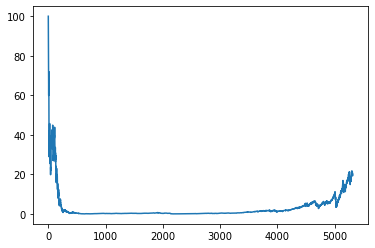

In [2]:
df['Change Rate'] = (df['Close'] - df['Close'].shift()) / df['Close'].shift()
df['TQQQ Change Rate'] = df['Change Rate'] * 3

initCash = 100
property = initCash
totalCash = property
crr = [initCash]
for index, data in df[1:].iterrows():
    rate = data['TQQQ Change Rate']
    property *= (rate+1)
    crr.append(property)
df['TQQQ Price'] = crr
print(df['TQQQ Price'].describe())
df['TQQQ Price'].plot()

### TQQQ 從2000年開始 分批投入

In [3]:
def regularQuota(addEachYear: float, source: pd.DataFrame):
    cashUnit = 1
    property = cashUnit
    totalCash = property
    propertyLogs = [property]
    rateLogs = [1]
    addYear = int(source['Date'].values[0].split('-')[0])
    for index, data in source[1:].iterrows():
        if data['Date'].startswith(str(addYear)):
            addYear+=1
            addCash = cashUnit * addEachYear
            property += addCash
            totalCash += addCash
        rate = data['TQQQ Change Rate']
        property *= (rate+1)
        propertyLogs.append(property)
        rateLogs.append((property-totalCash)/totalCash * 100)
    return [totalCash, propertyLogs, rateLogs]

### 從2000年開始

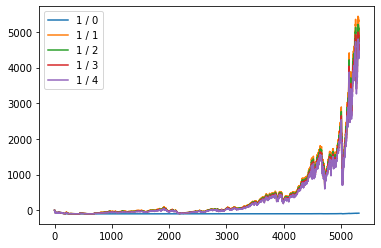

In [4]:
import matplotlib.pyplot as plt
results = [regularQuota(0 if i==0 else 1 / i, df) for i in range(0, 5)]
fig = plt.figure()
for i in range(0, len(results)):
    result = results[i]
    plt.plot(result[2], label=f'1 / {i}')
plt.legend()

### 從近 1000 筆資料計算

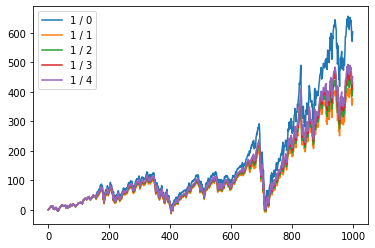

In [5]:
import matplotlib.pyplot as plt
results = [regularQuota(0 if i==0 else 1 / i, df[-1000:]) for i in range(0, 5)]
fig = plt.figure()
for i in range(0, len(results)):
    result = results[i]
    plt.plot(result[2], label=f'1 / {i}')
plt.legend()

### 結論
在沒大跌幅的前提下，一次性投入越多能夠有最高的收入。  
但如果有大幅的跌幅，一次性投入可能會沒救。
分批相對就比較穩定。